<a href="https://colab.research.google.com/github/hemanthmeruga/IEApp/blob/master/R7_InternalLab_Questions_FMNIST_Simple_CNN_CIFAR_DATA_Augment_HM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
% matplotlib inline
import vis
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:


from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Find dimensions of an image in the dataset

In [4]:
x_train.shape

(60000, 28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
x_train_conv = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
y_train_class = keras.utils.to_categorical(y_train, 10)
y_test_class = keras.utils.to_categorical(y_test, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train_conv =  x_train_conv.astype("float32") / 255
x_test_conv = x_test_conv.astype("float32") / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train_conv = x_train.reshape(x_train_conv.shape[0], 28, 28, 1)
x_test_conv = x_test.reshape(x_test_conv.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [9]:
model_simple_conv = Sequential()
model_simple_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(128, activation='relu'))
model_simple_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_simple_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [12]:
%%time 
from keras.callbacks import EarlyStopping
early_stopping = [EarlyStopping(patience=5)]
output_pooling_conv = model_simple_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2, callbacks=early_stopping,
                    validation_data=(x_test_conv, y_test_class))
                              

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 12.9158 - acc: 0.1971 - val_loss: 12.8977 - val_acc: 0.1998
Epoch 2/10
 - 4s - loss: 12.9075 - acc: 0.1992 - val_loss: 12.9090 - val_acc: 0.1991
Epoch 3/10
 - 4s - loss: 12.9068 - acc: 0.1992 - val_loss: 12.9090 - val_acc: 0.1991
Epoch 4/10
 - 4s - loss: 12.9068 - acc: 0.1992 - val_loss: 12.9090 - val_acc: 0.1991
Epoch 5/10
 - 4s - loss: 12.9068 - acc: 0.1992 - val_loss: 12.9090 - val_acc: 0.1991
Epoch 6/10
 - 4s - loss: 12.9068 - acc: 0.1992 - val_loss: 12.9090 - val_acc: 0.1991
CPU times: user 15.5 s, sys: 6.44 s, total: 22 s
Wall time: 28.9 s


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [13]:
model_pooling_conv = Sequential()
model_pooling_conv.add(Conv2D(32, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Dropout(0.25))
model_pooling_conv.add(Conv2D(32, (3, 3), activation ="relu"))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Dropout(0.25))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(Dense(10, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
__________

In [0]:
model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [16]:
%%time 
from keras.callbacks import EarlyStopping
output_pooling_conv = model_pooling_conv.fit(x_train_conv, y_train_class, batch_size=512, epochs=10, verbose=2, callbacks=early_stopping,
                    validation_data=(x_test_conv, y_test_class))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 3s - loss: 8.6098 - acc: 0.4481 - val_loss: 4.1248 - val_acc: 0.6325
Epoch 2/10
 - 2s - loss: 1.1787 - acc: 0.7006 - val_loss: 0.6387 - val_acc: 0.7884
Epoch 3/10
 - 2s - loss: 0.5965 - acc: 0.7796 - val_loss: 0.5227 - val_acc: 0.8143
Epoch 4/10
 - 2s - loss: 0.5192 - acc: 0.8073 - val_loss: 0.4645 - val_acc: 0.8349
Epoch 5/10
 - 2s - loss: 0.4703 - acc: 0.8264 - val_loss: 0.4159 - val_acc: 0.8498
Epoch 6/10
 - 2s - loss: 0.4317 - acc: 0.8395 - val_loss: 0.3909 - val_acc: 0.8563
Epoch 7/10
 - 2s - loss: 0.4068 - acc: 0.8498 - val_loss: 0.3671 - val_acc: 0.8597
Epoch 8/10
 - 2s - loss: 0.3816 - acc: 0.8579 - val_loss: 0.3690 - val_acc: 0.8568
Epoch 9/10
 - 2s - loss: 0.3666 - acc: 0.8654 - val_loss: 0.3385 - val_acc: 0.8752
Epoch 10/10
 - 2s - loss: 0.3522 - acc: 0.8701 - val_loss: 0.3378 - val_acc: 0.8711
CPU times: user 17.1 s, sys: 5.54 s, total: 22.6 s
Wall time: 24.5 s


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
datagen.fit(x_train_conv)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

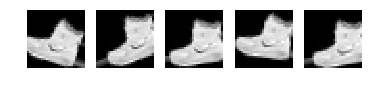

In [20]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [21]:
x_train_conv[:1].shape

(1, 28, 28, 1)

In [0]:
datagen.fit(x_train_conv[:1])

In [0]:
samples = datagen.flow(x_train_conv[:1])

In [24]:
image = []
for i in range(3):
    img = samples.next()
    img = img.squeeze()
    image.append(vis.imshow(img))
image[0] | image[1] | image[2]

AttributeError: ignored

###  Report the final train and validation accuracy

In [25]:
model_pooling_conv.evaluate(x_test_conv,y_test_class)

10000/10000 [==============================] - 1s 71us/step


[0.33777024414539336, 0.8711]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

### **Load CIFAR10 dataset**

In [27]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 31s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    rotation_range=25,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

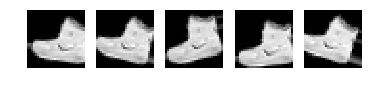

In [30]:


gen = datagen.flow(x_train_conv[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()